In [2]:
#Import of packages 
import pandas as pd
import math
import scipy
import scipy.stats
import numpy as np
import random
# setup plotting tools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#from util import lexsort_rows

#import seaborn as sns
#sns.set_style("whitegrid", {'axes.grid' : False})
from scipy.sparse.linalg import eigsh
#from sympy import *
from numpy.linalg import inv
import itertools
from itertools import groupby
from functools import reduce
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import operator
from operator import itemgetter
from scipy.spatial import Delaunay
import networkx as nx
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from matplotlib.patches import Polygon
from pylab import rcParams
from matplotlib.collections import PatchCollection



In [3]:
N=20
c=2
G = nx.erdos_renyi_graph(N,c/N)
comp_gen = nx.connected_components(G)
gcc = sorted(comp_gen,key=len,reverse=True)[0]
R = len(gcc)/N
R


0.9

In [4]:

def Rgcc(N,c):
    G = nx.erdos_renyi_graph(N,c/N)
    comp_gen = nx.connected_components(G)
    gcc = sorted(comp_gen,key=len,reverse=True)[0]
    R = (len(gcc)/N)
    return  R
    
Rgcc(10,5)    

N = 1000
list_R =[]
list_c =[]
for c in np.linspace(0,5,100):
    
    R = Rgcc(N,c)
    list_c.append(c)
    list_R.append(R)
    
 

Text(0, 0.5, '$R$')

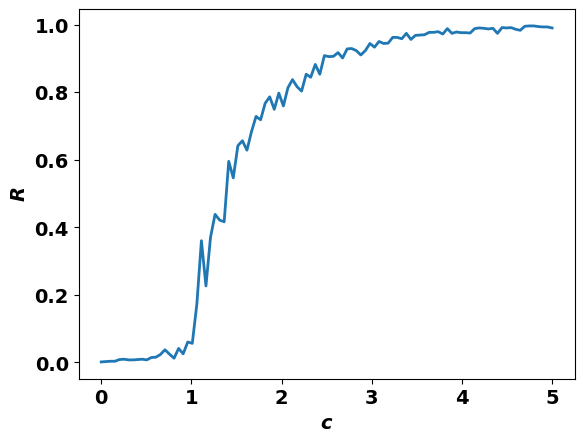

In [5]:
rcParams['lines.linewidth'] = 2
font = {'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)


plt.plot(list_c,list_R)
plt.xlabel('$c$')
plt.ylabel('$R$')

In [6]:
N=10000
G =nx.barabasi_albert_graph(N,1)
#G = nx.erdos_renyi_graph(N,4/N)
weights = np.random.random(nx.number_of_edges(G))
G_new = nx.Graph()
G_new.add_weighted_edges_from([(e[0][0], e[0][1], e[1]) for e in zip(G.edges(), weights)])
N=G_new.number_of_nodes()

In [7]:
def R_percolation(G, N, T, copy=True):
    F=G.copy() if copy else G
    F.remove_edges_from([(n1,n2) for n1, n2, w in F.edges(data='weight')
                        if w>T])
    comp_gen = nx.connected_components(F)
    gcc = sorted(comp_gen,key=len,reverse=True)[0]
    
    R = (len(gcc)/N)
    return R



    


list_R =[]
list_p =[]
for p in np.linspace(0,1,100):
    
    R = R_percolation(G_new,N,p)
    list_p.append(p)
    list_R.append(R)



Text(0, 0.5, '$R$')

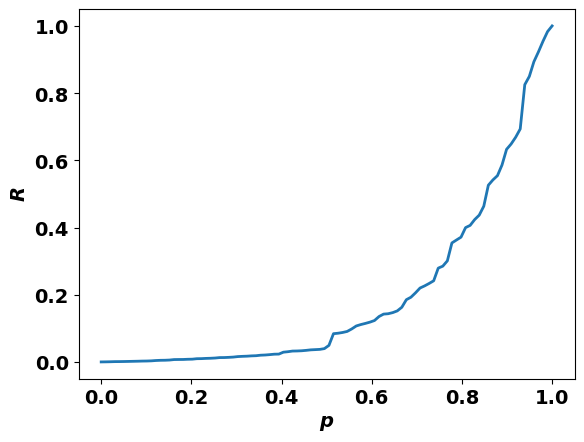

In [8]:
rcParams['lines.linewidth'] = 2
font = {'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)


plt.plot(list_p,list_R)
plt.xlabel('$p$')
plt.ylabel('$R$')

In [9]:
df = pd.read_csv("EUAirTransportation_multiplex.edges", sep=" ", header=None, 
                 names=['layerID', 'node1', 'node2','weight'])
#df['inverse_weight'] = 1 / df['weight']

df['random_weight'] = np.random.random(len(df))

b1 = df[df['layerID']==15]


edge_list1 =b1[['node1', 'node2']].copy()
edge_list1['weight']=np.random.random(len(edge_list1))


#egde_list2a = edge_list2.values.tolist()

G = nx.Graph()
G.add_weighted_edges_from(edge_list1.values)

#G.edges(data='weight')
N=G.number_of_nodes()


 


list_R =[]
list_p =[]
for p in np.linspace(0,1,100):
    
    R = R_percolation(G,N,p)
    list_p.append(p)
    list_R.append(R)

rcParams['lines.linewidth'] = 2
font = {'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)


plt.plot(list_p,list_R)
plt.xlabel('$p$')
plt.ylabel('$R$')

FileNotFoundError: [Errno 2] No such file or directory: 'EUAirTransportation_multiplex.edges'